In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt



In [26]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\PENGUIN DATASET\peniguncleandata.xlsx")
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [27]:
df.shape

(344, 8)

In [28]:
X = df.drop(['species'], axis=1)
y = df['species']


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [30]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
150,36.0,17.1,187.0,3700.0,1,0,0
105,39.7,18.9,184.0,3550.0,0,0,1
112,39.7,17.7,193.0,3200.0,0,0,0
162,46.6,17.8,193.0,3800.0,1,0,0
328,43.3,14.0,208.0,4575.0,0,0,0
...,...,...,...,...,...,...,...
203,51.4,19.0,201.0,3950.0,1,0,1
255,48.4,16.3,220.0,5400.0,0,0,1
72,39.6,17.2,196.0,3550.0,0,1,0
235,49.3,15.7,217.0,5850.0,0,0,1


In [31]:
y_train

150    0
105    0
112    0
162    1
328    2
      ..
203    1
255    2
72     0
235    2
37     0
Name: species, Length: 275, dtype: int64

In [32]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
306,43.4,14.4,218.0,4600.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
291,46.4,15.6,221.0,5000.0,0,0,1
102,37.7,16.0,183.0,3075.0,0,0,0
289,50.7,15.0,223.0,5550.0,0,0,1
...,...,...,...,...,...,...,...
89,38.9,18.8,190.0,3600.0,1,0,0
29,40.5,18.9,180.0,3950.0,0,0,1
58,36.5,16.6,181.0,2850.0,0,0,0
212,51.9,19.5,206.0,3950.0,1,0,1


In [33]:
y_test

306    2
341    2
291    2
102    0
289    2
      ..
89     0
29     0
58     0
212    1
93     0
Name: species, Length: 69, dtype: int64

In [34]:
#modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=True)
dt_default.fit(X_train,y_train)
#prediction
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)
#evaluation
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(pred_train,y_train))
print('test accuracy',accuracy_score(base_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(dt_default,X,y,cv=5).mean())

train accuracy 1.0
test accuracy 0.9855072463768116
cross validation score 0.9708866155157716


# modelling 

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=True)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=True)

In [36]:
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(pred_train,y_train))
print('test accuracy',accuracy_score(base_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(dt_default,X,y,cv=5).mean())

train accuracy 1.0
test accuracy 0.9855072463768116
cross validation score 0.9708866155157716


In [38]:
X.columns.to_list()

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'island_Torgersen',
 'sex_MALE']

# visualize the tree

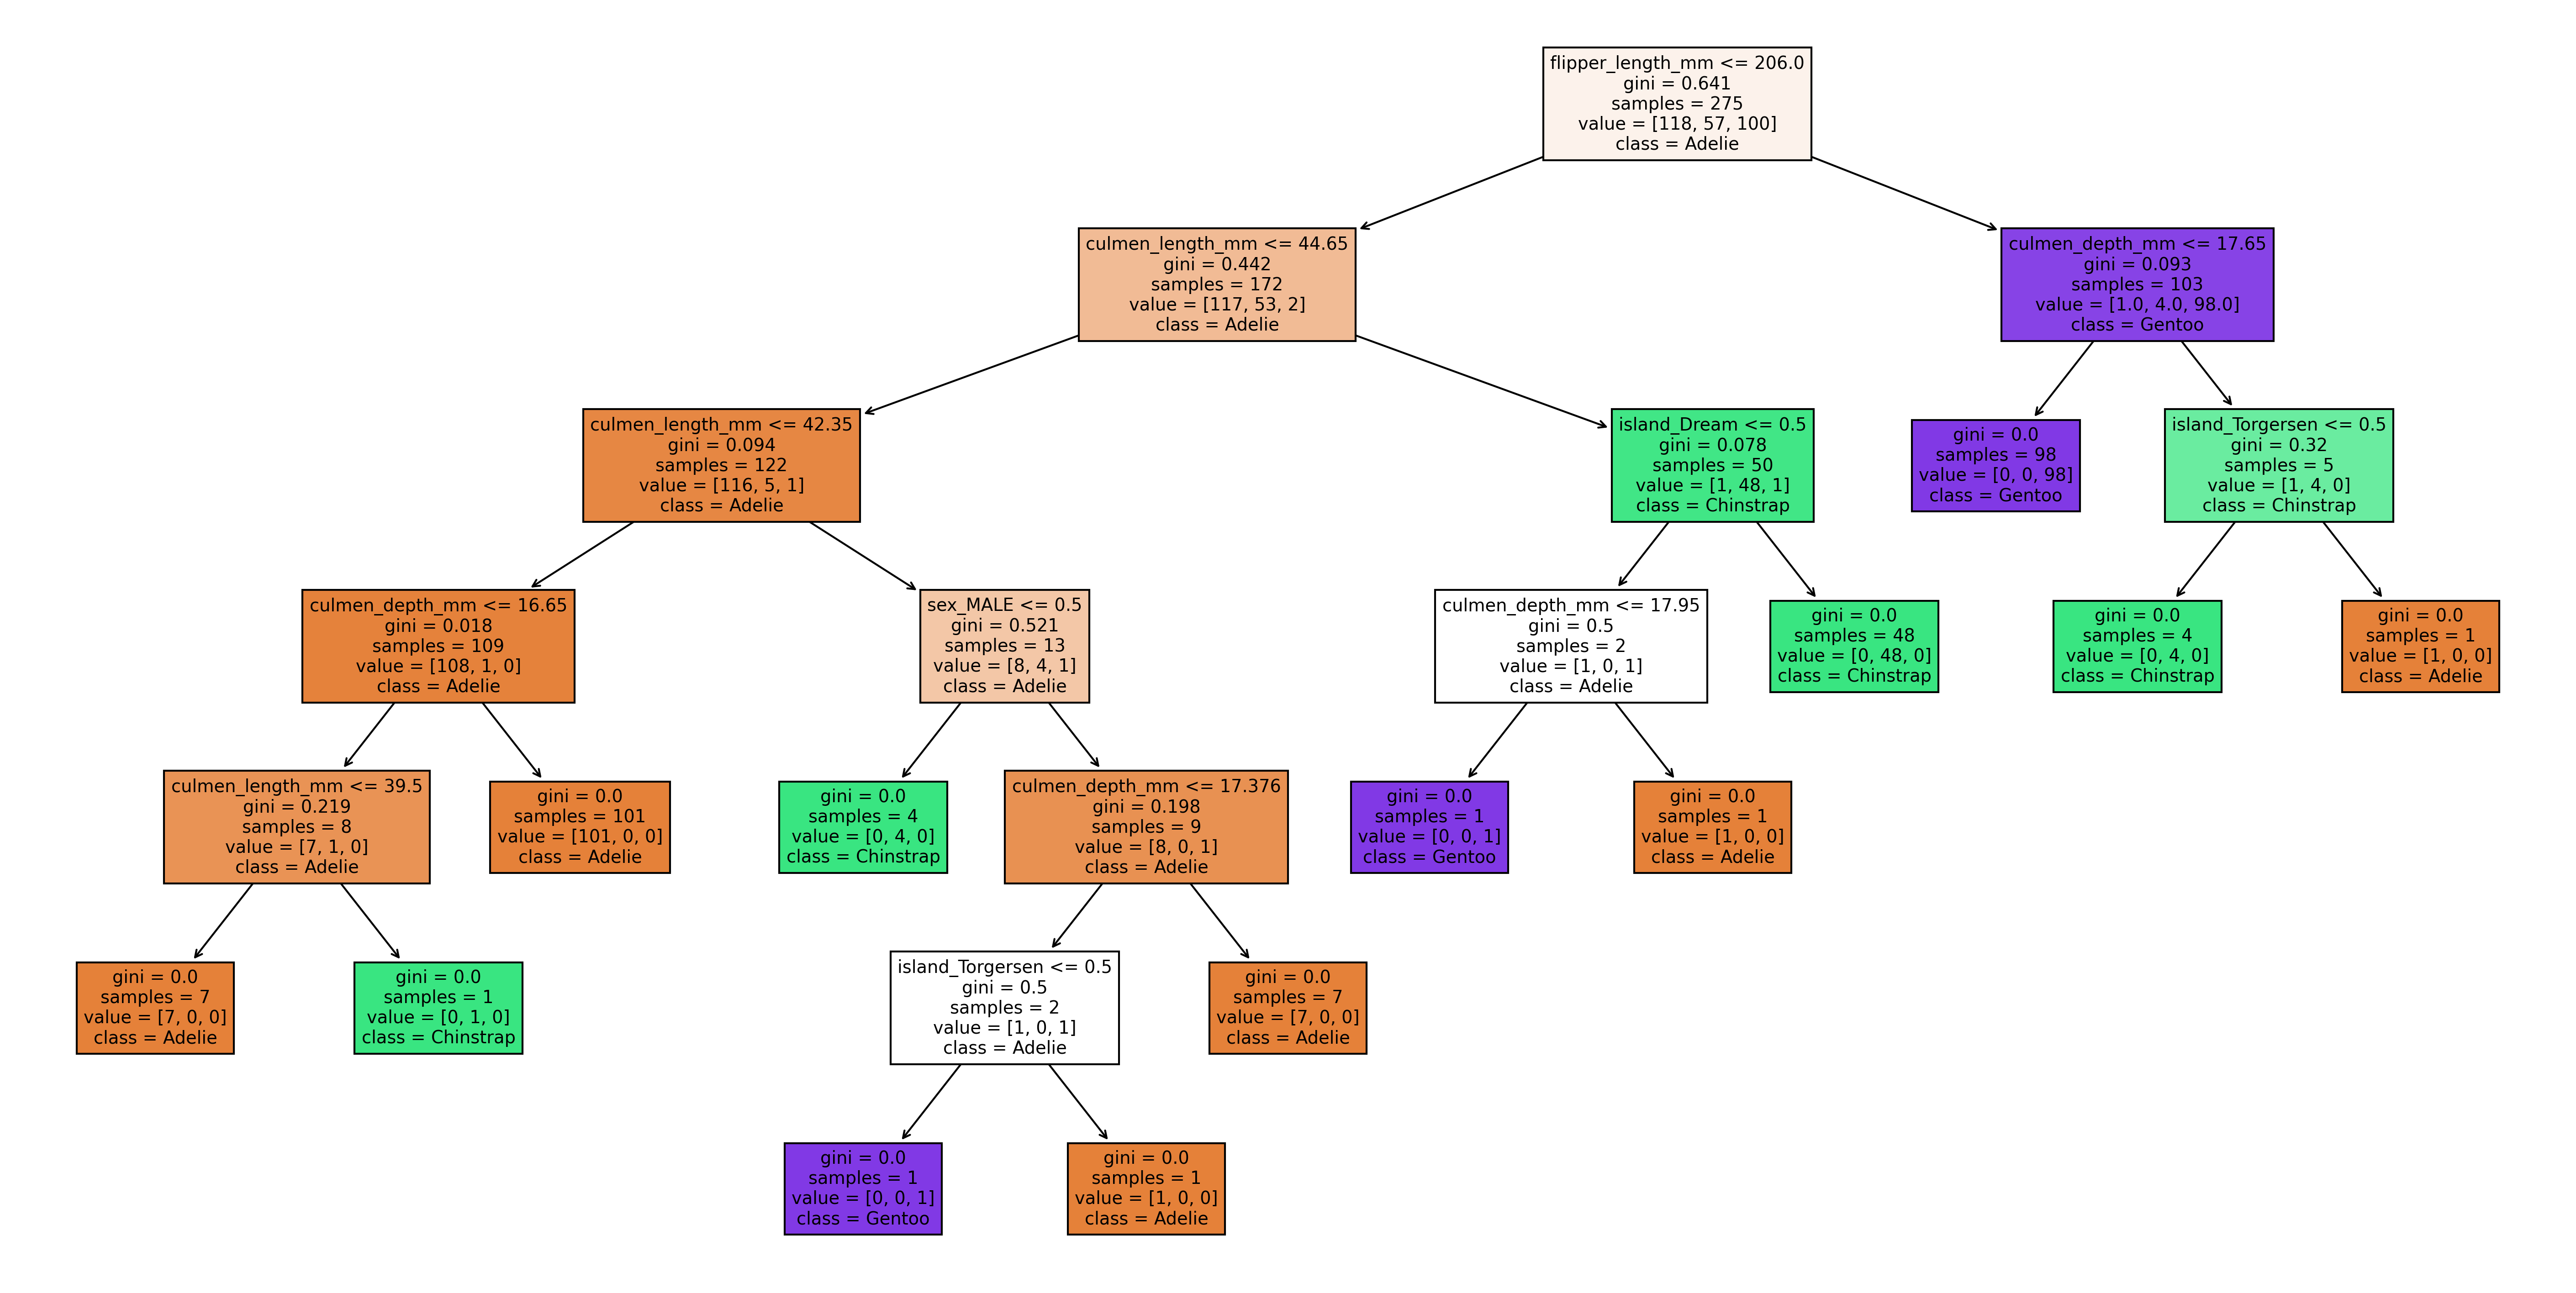

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)

plot_tree(dt_default,filled = True,feature_names = X_train.columns.tolist(),
class_names = ['Adelie','Chinstrap','Gentoo'])
plt.show()

# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
# model
estimator = DecisionTreeClassifier(random_state=True)

# parameters (which you want to tune and identify the best)

param_grid = {'criterion' :['gini','Entropy'],
              'max_depth':range(1,10)}

grid = GridSearchCV(estimator,param_grid,scoring ='accuracy',cv= 5)

grid.fit(X_train,y_train)

grid.best_params_


{'criterion': 'gini', 'max_depth': 4}

In [41]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 4,random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=True)

In [42]:
from sklearn.tree import plot_tree
plt.figure (figsize=(20,20),dpi=500)

plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),
          class_names= ['Adelie','Chinstrap','Gentoo'])
plt.show()

**After Creating decision tree model ,using this dt model we can identify important features**

In [43]:
grid.best_estimator_.feature_importances_

array([0.36735072, 0.04763015, 0.53016346, 0.        , 0.02594675,
       0.        , 0.02890893])

In [44]:
s1 = pd.DataFrame(model.feature_importances_,
                  columns = ['feature_importance'],
                  index = X_train.columns.tolist())
imp =s1[s1['feature_importance']>0].index.tolist()
imp

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'island_Dream',
 'sex_MALE']

**Final decision tree model
with best hyperparameters and with important features**

In [45]:
X_train = X_train[imp]
X_test = X_test[imp]

In [47]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 4,random_state=True)
model.fit(X_train,y_train) 

pred_train = model.predict(X_train)
base_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(pred_train,y_train))
print('test accuracy',accuracy_score(base_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

train accuracy 0.9927272727272727
test accuracy 0.9855072463768116
cross validation score 0.9650042625745952
